In [2]:
import pandas as pd
import expy
import ipywidgets as widgets
from expy import Experiment
from IPython.display import Markdown as md
from ipywidgets import interact, interact_manual, interactive_output, GridspecLayout, Layout, HTML, VBox, HBox
import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use("mystyle-jupyter")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Loading experiment 

In [3]:
file = "exp_sample.json"

In [4]:
ex = expy.read(file)
title = ex.name if ex.name else "Experiment"

In [5]:
md(f"# {title}")

# Experiment

In [6]:
show = True
if show:
    display(md(filename=("LabNotes.md")))

## Laboratory notes
Insert here all the relevant laboratory notes.

## General summary

In [7]:
show = False
if show: 
    print(ex)

General attributes belonging to the events

In [8]:
attributes = ex.get_attributes()
print(attributes)

      T1 T2  Pid          P
0  Spot3  G  P17  11.310532
1  Spot3  G  P11   6.397365
2  Spot3  G  P14   7.915588
3  Spot3  G  P16  10.022278
4  Spot3  G  P13   7.279942
5  Spot3  G  P15   8.981847
6  Spot3  G  P12   6.709786


Here are the fitted parameters of our experiment:

In [9]:
show = True
df = ex.functions_flat
if show: 
    display(df)

name     T1   T2  Pid          P   VoigtA                    \
                                             Center   Height     Area   
0  Spot3_G_P17  Spot3    G  P17  11.310532  1618.74  782.518  65071.4   
1          NaN    NaN  NaN  NaN        NaN      NaN      NaN      NaN   
2  Spot3_G_P14  Spot3    G  P14   7.915588  1598.38  791.027  67760.6   
3  Spot3_G_P16  Spot3    G  P16  10.022278  1627.09  572.353  46004.5   
4  Spot3_G_P13  Spot3    G  P13   7.279942      NaN      NaN      NaN   
5  Spot3_G_P15  Spot3    G  P15   8.981847  1616.88 -744.985 -64662.6   
6  Spot3_G_P12  Spot3    G  P12   6.709786      NaN      NaN      NaN   

                                                                          \
       FWHM       a0   err_a0       a1    err_a1         a2       err_a2   
0  67.21550  65071.4  450.053  1618.74  0.154970  31.557500     0.658139   
1       NaN      NaN      NaN      NaN       NaN        NaN          NaN   
2  68.31620  67760.6  415.053  1598.38  0.145700  31.167100     0.618165   
3  55.57880  46004.5  349.747  1627.09  0.168242  15.561900     0.989966   
4       NaN      NaN      NaN      NaN       NaN        NaN          NaN   
5  -3.82372 -64662.6  399.307  1616.88  0.183974  -0.025197  1501.460000   
6       NaN      NaN      NaN      NaN       NaN        NaN          NaN   

                             LorentzianA                                       \
            a3        err_a3      Center    Height     Area     FWHM       a0   
0     0.396877  2.668430e-02         NaN       NaN      NaN      NaN      NaN   
1          NaN           NaN         NaN       NaN      NaN      NaN      NaN   
2     0.445219  2.559690e-02         NaN       NaN      NaN      NaN      NaN   
3     1.375720  1.207700e-01         NaN       NaN      NaN      NaN      NaN   
4          NaN           NaN     1600.32   954.721  74206.2  49.4816  74206.2   
5 -1096.510000  6.534090e+07         NaN       NaN      NaN      NaN      NaN   
6          NaN           NaN     1600.30  1148.200  68799.2  38.1457  68799.2   

                                                  
    err_a0       a1    err_a1       a2    err_a2  
0      NaN      NaN       NaN      NaN       NaN  
1      NaN      NaN       NaN      NaN       NaN  
2      NaN      NaN       NaN      NaN       NaN  
3      NaN      NaN       NaN      NaN       NaN  
4  385.810  1600.32  0.140186  24.7408  0.188786  
5      NaN      NaN       NaN      NaN       NaN  
6  330.489  1600.30  0.101524  19.0729  0.134752

### Functions 

Here is a list of all the functions used in the fitting process:

In [10]:
functions = sorted(set(ex.functions.fname)) 
print(*functions, sep = ", ")

LorentzianA, VoigtA



## Widgets

In [11]:
# functions
to_plot = widgets.SelectMultiple(options=["y", "ftot"] + functions, layout=Layout(width="auto"))
func_validator = widgets.widgets.Checkbox(value=False, description='Select', layout=widgets.Layout(width = "auto", justify_content="center"), indent=False,)
# bg
bg = widgets.SelectMultiple(options=functions, layout=Layout(width="auto"))
bg_validator = widgets.widgets.Checkbox(value=True, description='Subtract', indent=False, layout=widgets.Layout(width = "auto", justify_content="center"))
#labels
labels = widgets.Dropdown(value="none", options=["none"]+list(attributes.columns), layout=Layout(width="auto"))
labelsx = widgets.FloatSlider(value=1.05, step=.05, min=-1.2, max=1.2, description='x', indent=False, layout=Layout(width="auto"))
labelsy = widgets.FloatSlider(value=0, step=.1, min=0, max=5, description='y', indent=False, layout=Layout(width="auto"))
# lims
xlims = widgets.IntRangeSlider(value=[0, 3000], min=0, max=3000, step=1, description="xlim", layout=Layout(width="auto"))
ylims = widgets.Text(value="df.y.max()*2", description="ylim", layout=Layout(width="auto"))
factor = widgets.FloatSlider(value=1, step=1, min=0, max=10, description="Shift", layout=Layout(width="auto"))
#normalize 
norm = widgets.Dropdown(value="y", options=["none", "y", "ftot"]+functions, indent=False, layout=Layout(width="auto"))
# sorting
sort = widgets.Dropdown(value="none", options=["none"]+list(attributes.columns))
reverse = widgets.widgets.Checkbox(value=False, description='Reverse', indent=False,)
# labels
l1 = widgets.Label("Functions to plot", layout=Layout(justify_content="center"))
l2 = widgets.Label("Background", layout=Layout(justify_content="center"))
l3 = widgets.Label("Labels", layout=Layout(justify_content="center"))
l4 = widgets.Label("Positioning", layout=Layout(justify_content="center"))
l5 = widgets.Label("Sorting", layout=Layout(justify_content="center"))
l6 = widgets.Label("Normalize", layout=Layout(justify_content="center"))
hr = HTML('<hr style="border:1px color=#3333ff;">')

### Containers


In [12]:
v0 = VBox([l1, to_plot, func_validator], layout=Layout(width="20%"))
v1 = VBox([l2, bg, bg_validator], layout=Layout(width="20%"))
v2 = VBox([l3, labels, labelsx,labelsy], layout=Layout(width="50%"))
v3 = VBox([l4, xlims, ylims, factor], layout=Layout(width="50%"))
v4 = VBox([l5, HBox([sort, reverse])], layout=Layout(width="50%"))
v5 = VBox([l6, norm], layout=Layout(width="50%"))

h0 = HBox([v2, v3])
h1 = HBox([v4, v5])

widgets_stack = HBox([v0,v1,VBox([h0, hr, h1], layout=Layout(width="60%"))])

## Plotting

### Functions

In [13]:
def update_params(**args):
    funcs = list(args["to_plot"])
    if args["func_validator"]:
        to_plot.layout.visibility = "visible"
        if("y" in funcs): 
            yp = y_plot
            funcs.remove("y")
        else:
            yp = None
        if("ftot" in funcs): 
            ftotp = ftot_plot
            funcs.remove("ftot")
        else:
            ftotp = None
        op = {f:other_plot["_rem"] for f in funcs}
    else:
        to_plot.layout.visibility = "hidden"
        yp = y_plot
        ftotp = ftot_plot
        op = other_plot

    bg_pattern = "|".join(args["bg_fun"])
    if args["bg_validator"]:
        bg.layout.visibility = "visible"
    else:
        bg.layout.visibility = "hidden"
        bg_pattern = None
    
    if((norm:=args["norm"]) == "none"):
        norm = None
    else:
        norm = {"ref":norm, "exclude":"x"}

    if((sort:=args["sort"]) == "none"):
        fsort = None
    else:
        fsort = lambda x:x[1].attributes[sort]

    if((labs:=args["labels"]) != "none"):
        labelsx.layout.visibility = "visible"
        labelsy.layout.visibility = "visible"
    else:
        labs = None
        labelsx.layout.visibility = "hidden"
        labelsy.layout.visibility = "hidden"
    return {
        "y_plot":yp,
        "ftot_plot":ftotp,
        "other_plot":op,
        "bg_pattern":bg_pattern, 
        "to_background" : None, 
        "normalized":norm,
        "sort":fsort,
        "labels":labs,
        "labels_format":plabels_format,
        "xlabels":args.pop("labelsx"),
        "ylabels_shift":args.pop("labelsy"),
        "xlim":args.pop("xlim"), 
        "ylim":args.pop("ylim"),
        "factor":args["factor"]
    }

In [14]:
def plot_stack(**args):
    pars = update_params(**args)
    fig.clf()
    expy.plot_stack(ex, **pars)
    fig.gca().set(xlabel = xlabel, ylabel = ylabel, yticks=[])
    fig.tight_layout()
    

In [15]:
def plot_slide(**args):
    pass

### Plot parameters

In [16]:
# set up labels
xlabel = "x"
ylabel = "I (a.u.)"

# chose line colors
y_plot = {"pos":[".k"], "ms":2}
ftot_plot = {"pos":["-r"]}
other_plot = {"_rem":{"pos":["-"],"c":[0,.3957,.6043], "alpha":.3}}

# plot labels
plabels_format = ".2f"


### Stack plot

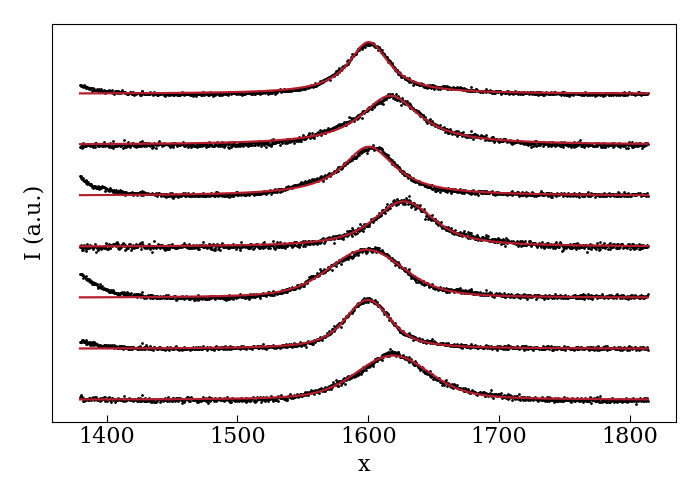

In [17]:
# Initialize plot
fig, ax = plt.subplots()
expy.plot_stack(ex, ax = ax)
ax.set(xlabel = xlabel, ylabel = ylabel)
ax.get_yaxis().set_ticks([])
fig.tight_layout()

interactive_output(plot_stack, {
    "to_plot":to_plot,
    "func_validator":func_validator,
    "norm":norm,
    "sort":sort,
    "reverse":reverse,
    "labels":labels,
    "labelsx":labelsx,
    "labelsy":labelsy,
    "bg_fun":bg,
    "bg_validator":bg_validator,
    "xlim":xlims, 
    "ylim" : ylims,
    "factor":factor,
    }
)


display(widgets_stack)


### Slider plot

Not implemented


In [18]:
# plt.close("all")